In [1]:
import healpy as h
import sys  ; sys.path.append("../../codes/")
from modules import euler as euler
from modules import rs_rad_ker as rk
from modules import convert_qu2eb as qb
from modules import convert_eb2qu as bq
from modules import convert_qu2_equ_bqu as qq
from scipy.interpolate import interp1d
from modules_old import local_eb_kernel as lrk
from modules import aliasing_correction as ac

%pylab notebook
import time

Populating the interactive namespace from numpy and matplotlib


In [2]:
nside=16 ; npix=h.nside2npix(nside)
sampling=4500
lmax=2*nside

pxsize=sqrt(4.*pi/h.nside2npix(nside))
beta0=min(180,180.*32/(lmax))*pi/180. ; print beta0*180/pi

theta,pl2=rk.get_plm0(lmax,sampling,theta_max=min(pi,3.*beta0))
theta_cutoff=pi

180.0


y=lrk.real_space_queb_kernels(nside,0,180.,lmax,sampling)
y.calc_qu2eb_rad_kernel(lmax)
y.calc_qu2queb_rad_kernel(lmax)
y.setup_fn_rad_ker()

In [3]:
cltemp=h.read_cl("../../data/cl_rem3.fits")
clr=[cltemp[0],cltemp[1],cltemp[2],cltemp[3]*0]

In [4]:
def get_alm(cl,lmax,mmax,seed=0):
    random.seed(seed)
    almsize=h.Alm.getsize(lmax,mmax)
    ar=random.normal(size=almsize)
    ai=random.normal(size=almsize)
    alm=zeros(almsize,complex)
    for i in range(almsize):
        l,m=h.Alm.getlm(lmax,i)
        if m==0:
            alm[i]=complex(ar[i],0.)*sqrt(cl[l])
        else:
            alm[i]=complex(ar[i],ai[i])*sqrt(0.5*cl[l])
    return alm

In [5]:
mmax=lmax
##########################################################
almt=get_alm(clr[0],lmax,mmax,1) ; alme=get_alm(clr[1],lmax,mmax,8) ; almb=get_alm(clr[2],lmax,mmax,3)
true_alm=[almt,alme,almb] 

ttqu=h.alm2map(true_alm,nside,lmax=lmax,mmax=mmax,pol=True) 
tteb=h.alm2map(true_alm,nside,lmax=lmax,mmax=mmax,pol=False)

alm=h.map2alm(ttqu,lmax=lmax,mmax=lmax,iter=0)
hteb=h.alm2map(alm,nside,pol=False,lmax=lmax,mmax=lmax)

alm=h.map2alm(ttqu,lmax=lmax,mmax=mmax,iter=0,pol=False)
htqu=h.alm2map(alm,nside,pol=True,lmax=lmax,mmax=mmax)

alm=h.map2alm(ttqu,lmax=lmax,mmax=mmax,iter=0)
alm[2][:]= 0 ; htque=h.alm2map(alm,nside,pol=True,lmax=lmax,mmax=mmax)
alm=h.map2alm(ttqu,lmax=lmax,mmax=mmax,iter=0)
alm[1][:]= 0 ; htqub=h.alm2map(alm,nside,pol=True,lmax=lmax,mmax=mmax)
###########################################################
#almt=get_alm(clr[0],lmax,mmax,4) ; alme=get_alm(clr[1],lmax,mmax,5) ; almb=get_alm(clr[2],lmax,mmax,6)
#true_alm=[almt,alme,almb] 
#tteb1=h.alm2map(true_alm,nside,lmax=lmax,mmax=mmax,pol=False) ; cltrue=h.alm2cl(true_alm,lmax=lmax,mmax=mmax)
#
#tqu1=h.alm2map(true_alm,nside,lmax=lmax,mmax=mmax,pol=True) 
#alm=h.map2alm(tqu,lmax=lmax,mmax=mmax,iter=0)
#hteb1=h.alm2map(alm,nside,pol=False,lmax=lmax,mmax=mmax) ; cl1=h.alm2cl(alm,lmax=lmax,mmax=mmax)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


In [6]:
apow=rk.fn_apodization(theta,theta_cutoff=theta_cutoff,apow_frac=0.001) ; apow[:]=1.
rad_ker=rk.calc_qu2eb_rad_ker(lmax,theta,pl2)# Default
rad_ker_i,rad_ker_d=rk.calc_qu2queb_rad_ker(lmax,theta,pl2)# Default

figure()
plot(theta,rad_ker)
plot(theta,rad_ker,"--")
axvline(pxsize)
xlim(0,min(pi,1.5*theta_cutoff))
rad_ker=rad_ker*apow

figure()
#plot(y.theta*180./pi,y.fn_rad_ker_m2(y.theta)*npix/(4.*pi),"k-")
plot(theta*180./pi,rad_ker_i,"r--")
#plot(y.theta*180./pi,y.fn_rad_ker_p2(y.theta)*npix/(4.*pi),"k-")
plot(theta*180./pi,rad_ker_d,"--")
#semilogy()

t1=time.time()
requ,rbqu=qq.convert_qu2_equ_bqu(ttqu[1],ttqu[2],180.*np.pi/180.,theta,rad_ker_i=rad_ker_i,rad_ker_d=rad_ker_d)
print time.time()-t1

In [8]:
alm=h.map2alm(ttqu,lmax=lmax,mmax=mmax,iter=3,pol=True)
htqu=h.alm2map(alm,nside,pol=True)
hteb=h.alm2map(alm,nside,pol=False)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


# Testing QU --> EB

In [9]:
ctqu=ac.correct_aliasing(ttqu[1],ttqu[2],pi,theta,rad_ker_i,iter=3)

In [14]:
tebr=qb.convert_qu2eb_radiate_masked(ctqu[1],ctqu[2],pi,theta,rad_ker)
tebc=qb.convert_qu2eb_integrate_masked(ctqu[1],ctqu[2],pi,theta,rad_ker)

<IPython.core.display.Javascript object>


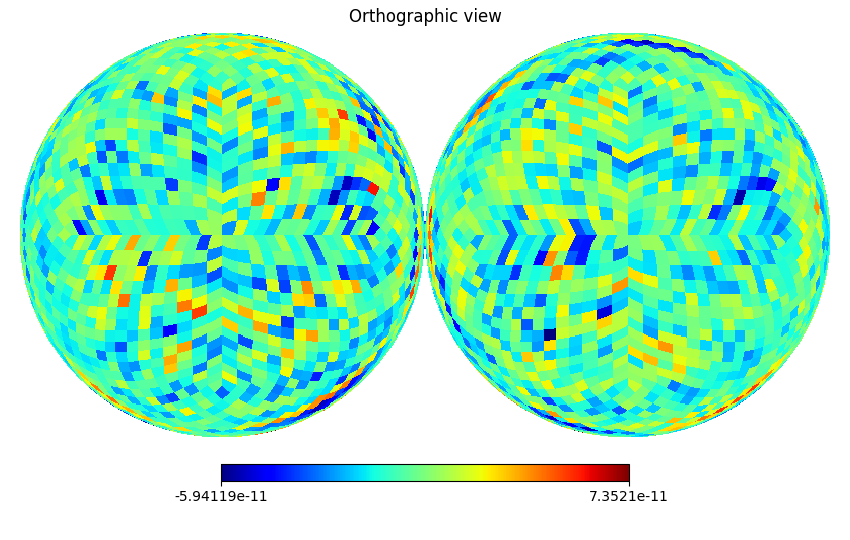

<IPython.core.display.Javascript object>


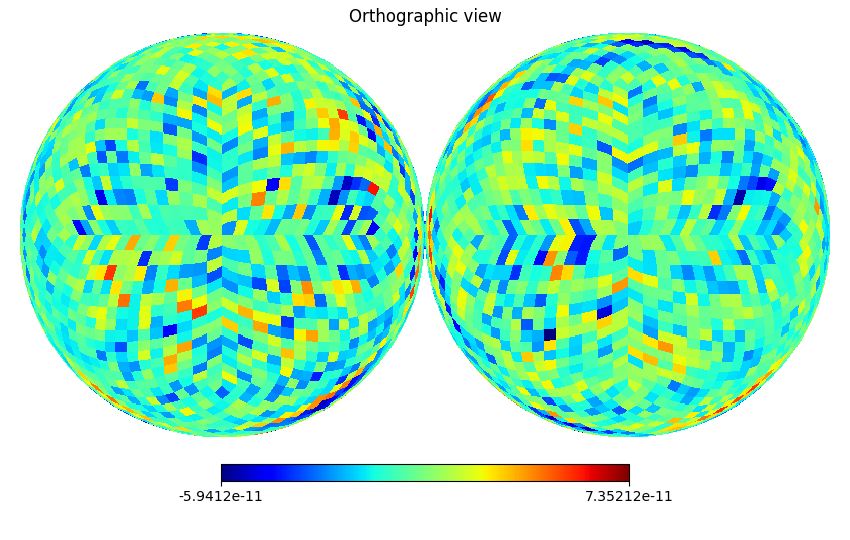

In [16]:
h.orthview(tebr[2]-hteb[2],rot=(0,90))
h.orthview(tebc[2]-hteb[2],rot=(0,90))

<IPython.core.display.Javascript object>


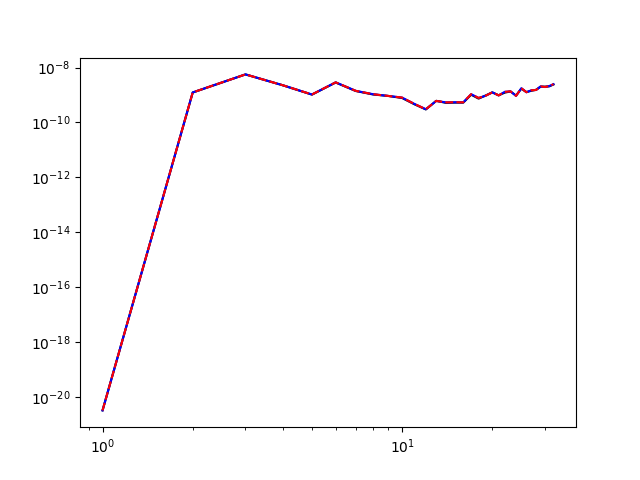

[]

In [18]:
lmax=2*nside
clrteb=h.alm2cl(h.map2alm(tebr[2],lmax=lmax))
clhteb=h.alm2cl(h.map2alm(hteb[2],lmax=lmax))
cltteb=h.alm2cl(h.map2alm(tteb[2],lmax=lmax))

ell=arange(lmax+1)
fll=ell*(ell+1)/(2.*pi)
figure()
plot(ell,fll*cltteb,"k-")
plot(ell,fll*clhteb,"b-")
plot(ell,fll*clrteb,"r--")
loglog()
#ylim(1e-10,1e-7)

# Testing EB --> QU

In [19]:
htqu=h.alm2map(h.map2alm(tteb,lmax=lmax,iter=0,pol=False),nside,pol=True)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


In [20]:
tqur=bq.convert_eb2qu_radiate_masked(tteb[1],tteb[2],pi,theta,rad_ker)
tquc=bq.convert_eb2qu_integrate_masked(tteb[1],tteb[2],pi,theta,rad_ker)

<IPython.core.display.Javascript object>


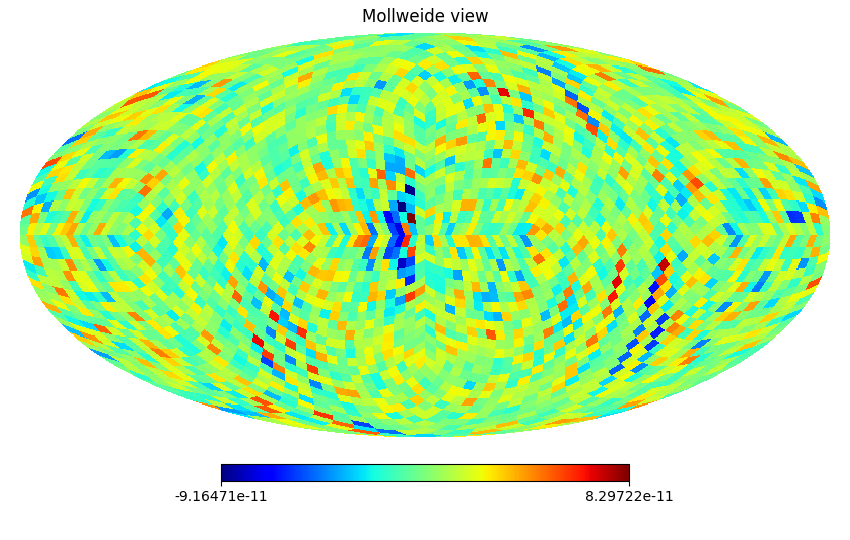

<IPython.core.display.Javascript object>


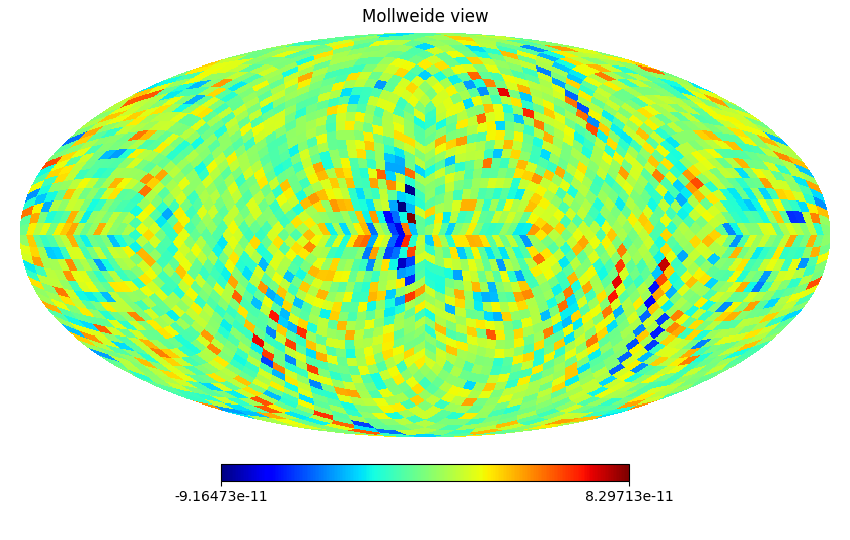

In [22]:
h.mollview(tqur[1]-htqu[1],rot=(0,90))
h.mollview(tquc[1]-htqu[1],rot=(0,90))

# Testing QU --> EQU, BQU

In [34]:
alm=h.map2alm(ttqu,lmax=lmax,iter=3) ; alm[2]=0. ; htque=h.alm2map(alm,nside,pol=True)
alm=h.map2alm(ttqu,lmax=lmax,iter=3) ; alm[1]=0. ; htqub=h.alm2map(alm,nside,pol=True)

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


In [32]:
equ,bqu=qq.convert_qu2_equ_bqu(ctqu[1],ctqu[2],pi,theta,rad_ker_i,rad_ker_d)

<IPython.core.display.Javascript object>


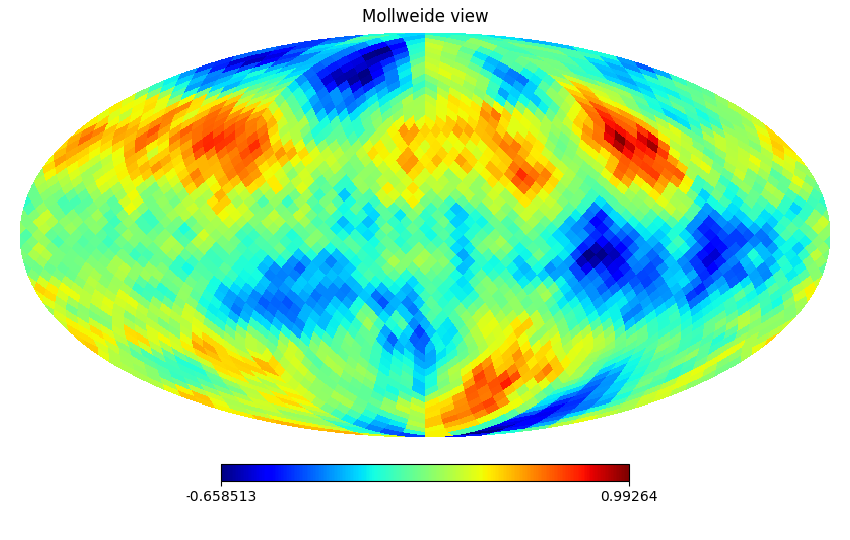

<IPython.core.display.Javascript object>


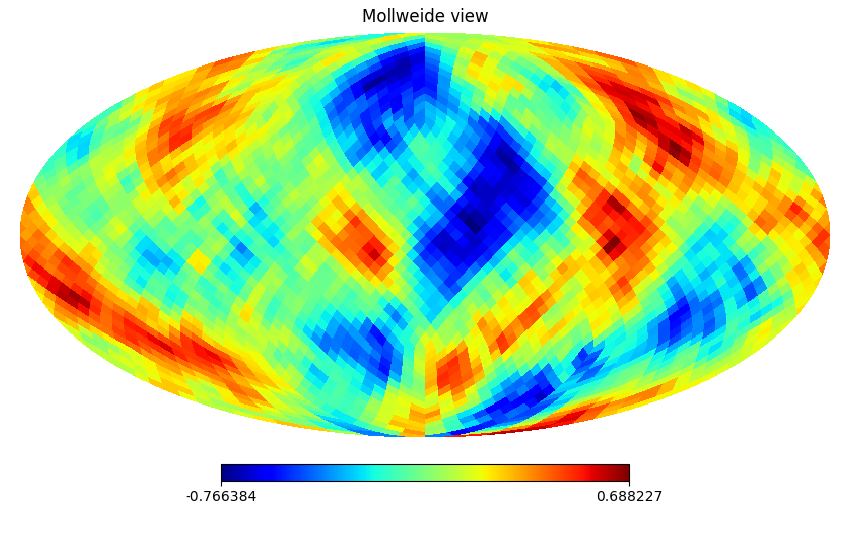

In [36]:
h.mollview(equ[1]-0*htque[1])
h.mollview(equ[2]-0*htque[2])

<IPython.core.display.Javascript object>


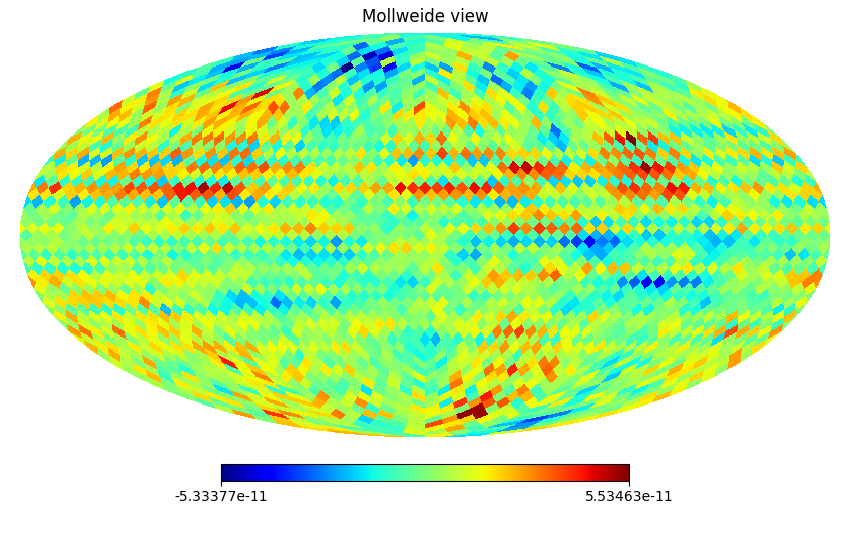

<IPython.core.display.Javascript object>


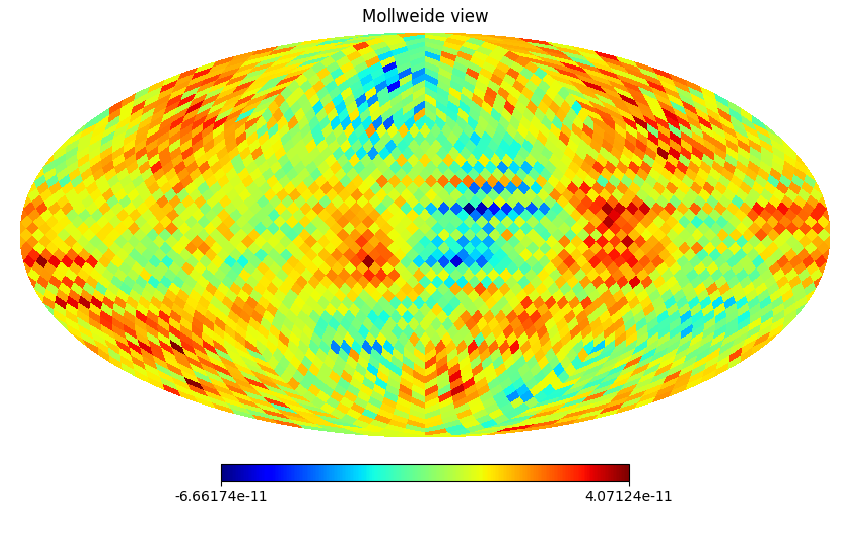

In [39]:
h.mollview(bqu[1]-htqub[1])
h.mollview(bqu[2]-htqub[2])